# Conducción de calor en 2D: <font color=green>Caso No estacionario</font>

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

*   Autores: 
    - Luis M. de la Cruz Salas
*   Rev: mié 12 may 2021 16:15:05 CDT

<img src="./Figuras/conceptualCOMPLETO.png" style="width: 300px;"/>

<div>
 <img src="./Figuras/condCalor2D.png"  hspace="5" vspace="5" style="float: right; width:150px"/>
    Estudiar la conducción de calor en una placa en dos dimensiones, como la que se muestra en la figura. La lontitud vertical de la placa es el doble que la longitud horizontal: $Ly = 2Lx$.
    Las condiciones de frontera son de tipo Dirichlet, es decir, la temperatura está dada en las paredes de la placa.
    En la figura se distingue $T_L, T_R, T_T$ y $T_B$ que corresponden a las temperaturas dadas en las paredes izquierda (LEFT), derecha (RIGHT), arriba (TOP) y abajo (BOTTOM), respectivamente. En este ejemplo tenemos los siguiente valores:
    
$$ 
T_L = 0, \qquad T_R = 0, \qquad T_B = 0, \qquad T_T = 1 
$$

La conductividad $\kappa$ se considera constante. En este caso **si hay dependencia temporal**.
</div>

<img src="./Figuras/matematicoCOMPLETO.png" style="width: 300px;"/>

El modelo matemático de este problema consiste de la siguiente ecuación diferencial parcial:

$$
\dfrac{\partial T}{\partial t} = 
\dfrac{\partial}{\partial x} \left(\kappa \dfrac{\partial T}{\partial x}\right) + \dfrac{\partial}{\partial y} \left(\kappa \dfrac{\partial T}{\partial y}\right) 
$$

<img src="./Figuras/numericoCOMPLETO.png" style="width: 300px;"/>

En este ejemplo haremos la solución de manera implícita y con el método de volumen finito (FVM, por sus siglas en inglés).


<img src="./Figuras/computacionalCOMPLETO.png" style="width: 450px;"/>

In [1]:
#-----------------------------------------------------------
# PARA DEFINIR EL PATH ABSOLUTO DE LOS MÓDULOS DE PYNOXTLI
#
#import os, sys
#sys.path.insert(0, os.path.abspath('../../base'))
#-----------------------------------------------------------

import numpy as np
#
# Importar módulos de pynoxtli
#
from macti.PyNoxtli.geo.rectangle import Rectangle
from macti.PyNoxtli.fvm.tDiffusion import tDiffusion2D
from macti.PyNoxtli.fvm.pde import PDE
from macti.PyNoxtli.utils.displayInfo import printInfo
import macti.PyNoxtli.vis.flowix as flx

# Si tienes instalado LaTeX, lo siguiente hace los textos 
# más estilizados. Si no tienes LaTeX, debes comentar la 
# línea: 'text.usetex': True
import matplotlib.pyplot as plt
# Parámetros para el estilo de las gráficas
params = {
          'text.usetex'    : True,
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [2]:
#
# Función que actualiza la solución y graficación en cada paso de tiempo
#
def solver(i, ax, dt):
    if i == 0:
        print('Wait for it ...')
    print(i,sep=' ', end = ' ')
    laplace.solve()     # Actualización de la solución del problema
    v.contourf(1, x, y, T, par_contourf) # Contornos llenos    
    # Textos de títulos
    time_step = i * dt
    title_graf = ' Step = {:>3d} \n Time = {:>6.5f}'.format(i, time_step)
    ax.set_title(title_graf)

In [3]:
#
# Parámetros para los contornos (llenos y vacíos)
#
par_contourf = {'cmap':'hot', 'levels':50}
par_contour  = {'colors':'gray', 'levels':10, 'linewidths':1.0, 'alpha':0.75}

In [4]:
#
# Datos del problema
#
longitud_x = 1.0 # meters
longitud_y = 2.0
TL = 0 # °C 
TR = 0 # °C
TB = 0 # °C
TT = 1 # °C
k  = 1 # W/m.K
Nx = 11 # Número de nodos
Ny = 21
dt = 0.01
Tmax = 30

In [5]:
#
# Definición del dominio y condiciones de frontera
#
placa = Rectangle(longitud_x, longitud_y)
placa.boundaryConditions(dirichlet = {'LEFT':TL, 'RIGHT':TR, 'BOTTOM':TB, 'TOP':TT})
#
# Creamos la malla y obtenemos datos importantes
#
malla     = placa.constructMesh(Nx, Ny)
ivx, ivy, _ = malla.bounds(bi = 1, ei = Nx-1,
                           bj = 1, ej = Ny-1)
nx  = malla.nx    # Número de nodos
ny  = malla.ny    # Número de nodos
nvx = malla.vx    # Número de volúmenes
nvy = malla.vy    # Número de volúmenes
dx  = malla.dx    # Tamaño de los volúmenes
dy  = malla.dy    # Tamaño de los volúmenes
#
# Imprimimos los datos del problema (nicely)
#
printInfo(Longitud_x = longitud_x,
          Longitud_y = longitud_y,
          TL_TR_TT_TB = (TL, TR, TT, TB),
          Conductividad = k,
          Nodos = (nx,ny),
          Volúmenes = (nvx,nvy),
          Deltas = (dx,dy),
          Inner = (ivx, ivy))

.--------------------------------------------------------------------------------.
|              PyNoxtli : Ver. 1.0, LMCS-2021, [GNU GPL License V3]              |
.--------------------------------------------------------------------------------.
|     Longitud_x = 1.000000000000000e+00                                         |
|     Longitud_y = 2.000000000000000e+00                                         |
|    TL_TR_TT_TB = (0, 0, 1, 0)                                                  |
|  Conductividad =     1                                                         |
|          Nodos =  (11, 21)                                                     |
|      Volúmenes =  (10, 20)                                                     |
|         Deltas = (0.1, 0.1)                                                    |
|          Inner =  (10, 20)                                                     |
.--------------------------------------------------------------------------------.


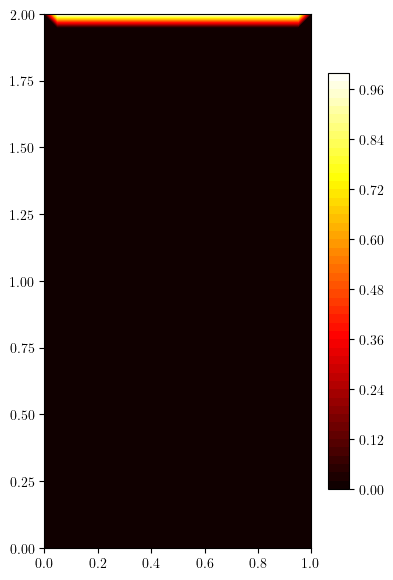

In [6]:
#
# Malla para graficar
#
x, y, _ = malla.coordinatesMeshFVM()
#
# Se construye el arreglo donde se guardará la solución
#
T = np.zeros((nvy+2, nvx+2)) # El arreglo inicial contiene ceros
T[-1,:] = TT # Condición de frontera pared superior
T[0,:] = TB  # Condición de frontera pared inferior
T[:,0] = TL  # Condición de frontera pared izquierda
T[:,-1] = TR # Condición de frontera pared derecha
#
# Visualización
#
axis_par = [{'aspect':'equal'}]   
v = flx.Plotter(1,1,axis_par, par_fig={'figsize':(4,6)})
con = v.contourf(1, x, y, T, par_contourf)
v.colorbar(1, con, {'shrink':0.75})
#
# Definimos la fuente 
#
Su = np.zeros((ivy, ivx))
#
# Definimos el esquema de disccretización
#
dif_scheme = tDiffusion2D(malla,Su, dt = dt, Gamma = k)
#
# Definimos la ecuación a resolver
#
laplace = PDE(placa, T)
#
# Creamos el sistema lineal y lo resolvemos
#
Su.shape = ivy * ivx
laplace.setNumericalScheme(dif_scheme)
#
# Resolvemos y graficamos para varios pasos de tiempo
#
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(v.fig,         # La figura donde se hace la animación
                     solver,        # la función que resuelve y cambia los datos
                     fargs=(v.axes(1), dt, ),   # argumentos para la función solver()
                     interval=500,  # Intervalo entre cuadros en milisegundos
                     frames=Tmax+1, # Número de iteraciones (Cuadros)
                     repeat=False)  # Permite poner la animación en un ciclo 
#
v.show()

In [7]:
from IPython.display import HTML

In [8]:
HTML(anim.to_jshtml())

Wait for it ...
0 Wait for it ...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 